## Introduction
<img align="right" width="100" src="https://python-visualization.github.io/folium/_images/folium_logo.jpg">

This is meant to be an exploratory dive into visualizing data on maps using Folium. I referenced this great [introduction to folium](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data) for a lot of the basic principles. More information can be found in the [Folium Documentation](https://python-visualization.github.io/folium/). Thanks to the creator of this great data set, and [their excellent kernel](https://www.kaggle.com/bappekim/visualizing-the-location-of-station-using-folium) that outlines some of the Folium methods. 

### Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_palette('dark')

import datetime

import os

import folium # This is the library for interactively visualizing data on the map

### Import and view Data

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_list = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv


#### Using the Pandas' `read_csv()` function to create DataFrames of the CSV's.

In [3]:
measurement_summary = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
measurement_item_info = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv')
measurement_info = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_info.csv')
measurement_station_info = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv')

Now that we've imported all the CSV data in to Panda's DataFrames, we can use the `.head()` function to get a sense of the type of information contained in each

In [4]:
print('Measurement Item info shape: {}'.format(measurement_item_info.shape))
measurement_item_info.head()

Measurement Item info shape: (6, 7)


,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [5]:
print('Measurement Station info shape: {}'.format(measurement_station_info.shape))
measurement_station_info.head()

Measurement Station info shape: (25, 5)


,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [6]:
print('Measurement Summary shape: {}'.format(measurement_summary.shape))
measurement_summary.head()

Measurement Summary shape: (647511, 11)


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [7]:
print('Measurement Info shape: {}'.format(measurement_info.shape))
measurement_info.head()

Measurement Info shape: (3885066, 5)


,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


## Data Preprocessing

In [8]:
pollutants = measurement_item_info['Item name'].tolist()
print(pollutants)

['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']


First, I'm going to set the station code as the index for the `measurement_station_info` DataFrame, so we can easily use each station code to index into the DataFrame later.


In [9]:
measurement_station_info.set_index('Station code', inplace=True)

From the `.head()` we can see that some measurements of PPM are coming out negative. This likely indicates an error or a distortion of the spectral baseline. We'll go ahead and set all of these to NaN for now.

In [10]:
for p in pollutants:
    measurement_summary[measurement_summary[p] < 0] = 0

Next, we'll get the mean for each pollutant type per station

In [11]:
station_mean = measurement_summary.groupby(['Station code']).mean()
station_mean.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
station_mean = station_mean.drop(station_mean.index[0])

For the purpose of visualizing the air quality in the Folium Map, we're going to create a "Pollutant Class" DataFrame containing the pollutant name and threshold for what is considered `Good`, `Normal`, `Bad`, and `Very Bad`


In [12]:
pollutant_class = measurement_item_info.drop(['Item code', 'Unit of measurement'], axis=1).set_index('Item name')
pollutant_class.head(10)

,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
Item name,,,,
SO2,0.02,0.05,0.15,1.0
NO2,0.03,0.06,0.20,2.0
CO,2.00,9.00,15.00,50.0
O3,0.03,0.09,0.15,0.5
PM10,30.00,80.00,150.00,600.0
PM2.5,15.00,35.00,75.00,500.0


### Building a classifier function
Building a quick function that returns either the string descriptor of the pollutant (`Good`, `Bad`, etc) or the corresponding color

In [13]:
def classifier(measurements, info, color=True):
    classified = pd.DataFrame(columns = measurements.columns)
    
    # classification to use
    if color:
        description = ['blue', 'green', 'yellow', 'red']
    else:
        description = ['Good', 'Normal', 'Bad', 'Very Bad']
    
    for i in measurements.index:
        for p in info.index:
            if measurements.loc[i, p] <= info.loc[p,'Good(Blue)']:
                classified.loc[i, p] = description[0]
            elif measurements.loc[i, p] <= info.loc[p, 'Normal(Green)']:
                classified.loc[i, p] = description[1]
            elif measurements.loc[i, p] <= info.loc[p, 'Bad(Yellow)']:
                classified.loc[i, p] = description[2]
            else:
                classified.loc[i, p] = description[3]
    return classified

means_classified = classifier(station_mean,pollutant_class)

## Data Visualization
Now that we done some precursory processing to our data, time to start visualizing!

In [14]:
measurement_summary['Measurement date'] = pd.to_datetime(measurement_summary['Measurement date'])
monthly_mean = measurement_summary.groupby(measurement_summary['Measurement date'].dt.month).mean()
monthly_mean.drop(['Station code', 'Latitude', 'Longitude'], axis=1, inplace=True)
monthly_mean.rename_axis('Month', inplace=True)
monthly_mean.head(12)

,SO2,NO2,O3,CO,PM10,PM2.5
Month,,,,,,
1,0.004786,0.033142,0.012179,0.639646,54.648392,32.318549
2,0.005126,0.034654,0.018113,0.643756,52.987717,32.492173
3,0.005065,0.037354,0.027629,0.591095,61.808290,41.018259
4,0.004389,0.029980,0.031329,0.478833,50.537966,25.543967
5,0.004561,0.027059,0.038366,0.455270,54.131451,26.568679
6,0.004064,0.022782,0.038213,0.417303,38.074731,24.392401
7,0.003936,0.019611,0.028268,0.394424,30.417253,20.835162
8,0.003773,0.018673,0.028107,0.389456,26.999314,16.227655
9,0.003680,0.022178,0.025981,0.422336,27.653415,15.830288


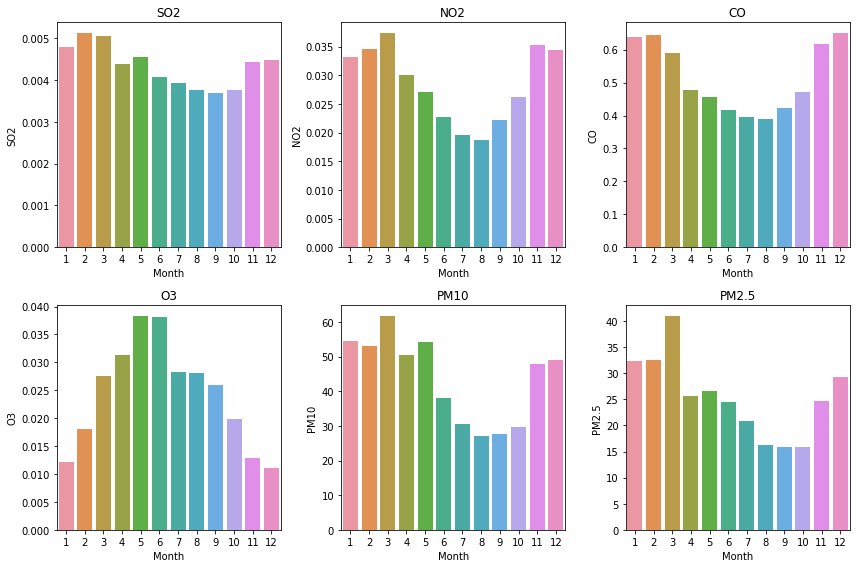

In [15]:
# chart each one of the means per month

fig, axs = plt.subplots(2,3, figsize=(12,8), tight_layout=True)

sns.barplot(monthly_mean.index, monthly_mean['SO2'], ax=axs[0,0]).set_title('SO2')
sns.barplot(monthly_mean.index, monthly_mean['NO2'], ax=axs[0,1]).set_title('NO2')
sns.barplot(monthly_mean.index, monthly_mean['CO'], ax=axs[0,2]).set_title('CO')
sns.barplot(monthly_mean.index, monthly_mean['O3'], ax=axs[1,0]).set_title('O3')
sns.barplot(monthly_mean.index, monthly_mean['PM10'], ax=axs[1,1]).set_title('PM10')
sns.barplot(monthly_mean.index, monthly_mean['PM2.5'], ax=axs[1,2]).set_title('PM2.5')

plt.show()

## Mapping the Data

### Setting up the Folium Map
It's time to get that data onto a map! First, We'll initialize a blank map centered over Seoul

In [16]:
# This creates the map object
m = folium.Map(
    location=[37.541, 126.981], # center of where the map initializes
    tiles='Stamen Toner', # the style used for the map (defaults to OSM)
    zoom_start=12) # the initial zoom level

# Diplay the map
m

### Mapping the means
We'll start by mapping the mean value for each pollutant, that we have calculated in the `station_means` DataFrame. The first thing we need to do is run our data throught he classifier function created earlier.

In [17]:
means_classified = classifier(station_mean,pollutant_class)

#### Here we'll use the classified pollutants to create a map displaying pins based on the mean measurement of that pollutant per station

In [81]:
def pollutant_map(pollutant, measurements, station_info):
     
    # takes an input of a pollutant reference sheet, classified measurement data per station, and measurement
    # station information and outputs a Foilum Map with one layer for each pollutant type
    
    
    #initialize the folium map
    m = folium.Map(
    location=[37.541, 126.981], 
    tiles='Stamen Toner',
    zoom_start=11)

    for p in pollutants:
        feature_group = FeatureGroup(name=p, show=False)
        
        for i in means_classified.index:
            feature_group.add_child(Marker(station_info.loc[i, ['Latitude', 'Longitude']],
                         icon=folium.Icon(color=measurements.loc[i, p],
                                          icon='warning',
                                          prefix='fa')))
            m.add_child(feature_group)
            
    m.add_child(folium.map.LayerControl())
    m.save('pollutant_map.html')

    return m

pollutant_map(pollutant_class, means_classified, measurement_station_info)

You can find the `.html` output file in the working directory for this notebook.

After viewing these maps, the mean measurements for each station are all within Good or Normal ranges (which should be expected). It might be more interesting to look at the outliers in these measurements, and see how each section of the city is affected

## Mapping the Outliers (coming soon!)
I'll be following up on this quick overview using folium to map some of the outlying measurements, and provide some data visualization too. Stay tuned!